In [126]:
import pandas as pd
import numpy as np
import pickle
from collections import defaultdict
import matplotlib.pyplot as plt

from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
with open('../dataframes/df_with_libs.p', 'rb') as read_file:
    df = pickle.load(read_file)

In [5]:
df['block_lat'].min()

41.644696143019985

## PMF coffee Shops

In [6]:
coffee_counts = defaultdict(int)

for index, item in df.iterrows():
    coffee_counts[item['cof_within_001']] += 1
 

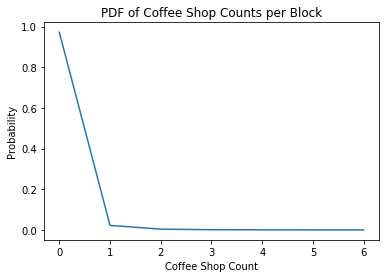

In [7]:
pmf_shops = defaultdict(int)
num_blocks = df.shape[0]
for key, value in coffee_counts.items():
    pmf_shops[key] = value/num_blocks
pmf_shops

fig = plt.figure()
ax  = plt.axes()
plt.title('PDF of Coffee Shop Counts per Block')
plt.xlabel('Coffee Shop Count')
plt.ylabel('Probability')
ax.plot(pmf_shops.keys(), pmf_shops.values())


## CDF Coffee Shops

In [8]:
cdf = {}
count = 0
num_blocks = df.shape[0]
for key, value in coffee_counts.items():
    cdf[key] = count/num_blocks
    count += value
cdf

{0: 0.0,
 1: 0.9722192218789829,
 2: 0.9944481648700612,
 3: 0.9982934047655052,
 4: 0.9994167332742866,
 5: 0.9998703851720637,
 6: 0.9999783975286772}

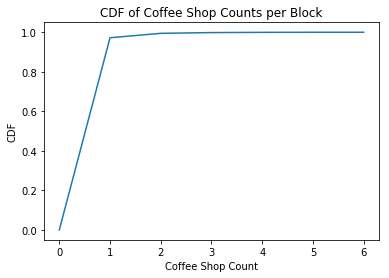

In [9]:
fig = plt.figure()
ax  = plt.axes()
plt.title('CDF of Coffee Shop Counts per Block')
plt.xlabel('Coffee Shop Count')
plt.ylabel('CDF')
ax.plot(cdf.keys(), cdf.values())

In [10]:
X_vals = np.linspace(0,6,14)
X_vals = X_vals.reshape(-1,1)
X = df['cof_within_001']

X = X.values.reshape(-1,1)

In [12]:
kde = KernelDensity(kernel='gaussian', bandwidth=.5).fit(X)
log_dens = kde.score_samples(X_vals)
kde.score()

TypeError: score() missing 1 required positional argument: 'X'

In [13]:
log_dens

array([ -0.25087445,  -0.66053447,  -1.83913692,  -3.46078265,
        -4.81902214,  -5.66010543,  -6.32174455,  -6.84395426,
        -7.32934326,  -7.7548946 ,  -8.33881184,  -8.9948097 ,
        -9.67713872, -10.44748742])

In [14]:
len(log_dens)

14

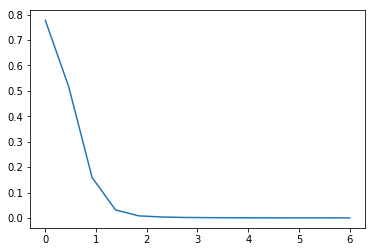

In [15]:
fig = plt.figure()
ax  = plt.axes()

ax.plot(X_vals, np.exp(log_dens))

In [16]:
from mpl_toolkits import mplot3d
%matplotlib inline



In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

X_ax = np.linspace(df['block_lat'].min(), df['block_lat'].max(), num = 1000)
y_ax = np.linspace(df['block_lon'].min(), df['block_lon'].max(), num = 1000)

X = list(df['block_lat'])
Y = list(df['block_lon'])
Z = np.array(df['cof_within_001'])
Z = Z.reshape((len(X),len(Y)))
# X,Y = np.meshgrid(X,Y)
# ax.contour3D(X, Y, Z, 50, cmap='binary')

In [ ]:
df['cof_within_001'].value_counts()

In [17]:
coffee_lat = df[['cof_within_001','block_lat', 'block_lon']]
coffee_lat = coffee_lat.sort_values('block_lat')
cof_within_100 = coffee_lat['cof_within_001'].values.reshape(-1,1)
X_vals = np.linspace(coffee_lat['block_lat'].min(), coffee_lat['block_lat'].max(), 46291)
X_vals = X_vals.reshape(-1,1)
X_vals
kde.fit(cof_within_100)
log_dens = kde.score_samples(X_vals)
log_dens
# plt.plot(X_vals, np.exp(log_dens))

array([-2552.05722045, -2552.05838574, -2552.05955104, ...,
       -2606.28267908, -2606.28385674, -2606.2850344 ])

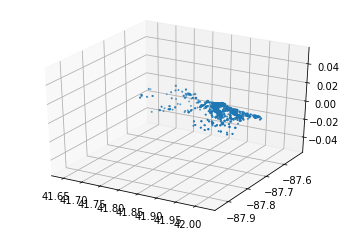

In [18]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x=coffee_lat['block_lat']
y=coffee_lat['block_lon']
z=coffee_lat['cof_within_001']
plt.scatter(x,y,z)

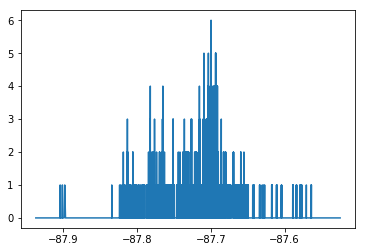

In [19]:
fig = plt.figure()
y=coffee_lat['block_lon'].sort_values(ascending=False)
z=coffee_lat['cof_within_001']
plt.plot(y,z)

ValueError: `bins` must increase monotonically, when an array

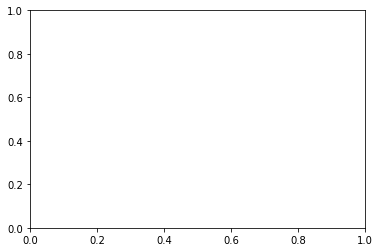

In [20]:
fig = plt.figure()
y=coffee_lat['block_lat'].sort_values(ascending=False)
z=coffee_lat['cof_within_001']
plt.hist(y,z)

In [21]:
y=coffee_lat['block_lat'].sort_values(ascending=False)
z=coffee_lat['cof_within_001'].values.reshape(-1,1)
z

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [22]:
kde = KernelDensity(kernel='gaussian', bandwidth=.1).fit(z)

In [23]:
X_vals=np.linspace(coffee_lat['block_lat'].min(), coffee_lat['block_lat'].max(), 1000)
X_vals
# X_vals = X_vals.reshape(-1,1)

array([41.64469614, 41.64507485, 41.64545356, 41.64583226, 41.64621097,
       41.64658968, 41.64696838, 41.64734709, 41.6477258 , 41.6481045 ,
       41.64848321, 41.64886192, 41.64924062, 41.64961933, 41.64999804,
       41.65037674, 41.65075545, 41.65113416, 41.65151286, 41.65189157,
       41.65227028, 41.65264898, 41.65302769, 41.6534064 , 41.6537851 ,
       41.65416381, 41.65454252, 41.65492122, 41.65529993, 41.65567864,
       41.65605734, 41.65643605, 41.65681476, 41.65719347, 41.65757217,
       41.65795088, 41.65832959, 41.65870829, 41.659087  , 41.65946571,
       41.65984441, 41.66022312, 41.66060183, 41.66098053, 41.66135924,
       41.66173795, 41.66211665, 41.66249536, 41.66287407, 41.66325277,
       41.66363148, 41.66401019, 41.66438889, 41.6647676 , 41.66514631,
       41.66552501, 41.66590372, 41.66628243, 41.66666113, 41.66703984,
       41.66741855, 41.66779725, 41.66817596, 41.66855467, 41.66893337,
       41.66931208, 41.66969079, 41.67006949, 41.6704482 , 41.67

In [24]:
log_probs = kde.score_samples(X_vals)
plt.ylim(-.0001,.0001)
plt.plot(X_vals, np.exp(log_probs))

ValueError: Expected 2D array, got 1D array instead:
array=[41.64469614 41.64507485 41.64545356 41.64583226 41.64621097 41.64658968
 41.64696838 41.64734709 41.6477258  41.6481045  41.64848321 41.64886192
 41.64924062 41.64961933 41.64999804 41.65037674 41.65075545 41.65113416
 41.65151286 41.65189157 41.65227028 41.65264898 41.65302769 41.6534064
 41.6537851  41.65416381 41.65454252 41.65492122 41.65529993 41.65567864
 41.65605734 41.65643605 41.65681476 41.65719347 41.65757217 41.65795088
 41.65832959 41.65870829 41.659087   41.65946571 41.65984441 41.66022312
 41.66060183 41.66098053 41.66135924 41.66173795 41.66211665 41.66249536
 41.66287407 41.66325277 41.66363148 41.66401019 41.66438889 41.6647676
 41.66514631 41.66552501 41.66590372 41.66628243 41.66666113 41.66703984
 41.66741855 41.66779725 41.66817596 41.66855467 41.66893337 41.66931208
 41.66969079 41.67006949 41.6704482  41.67082691 41.67120561 41.67158432
 41.67196303 41.67234173 41.67272044 41.67309915 41.67347785 41.67385656
 41.67423527 41.67461397 41.67499268 41.67537139 41.67575009 41.6761288
 41.67650751 41.67688622 41.67726492 41.67764363 41.67802234 41.67840104
 41.67877975 41.67915846 41.67953716 41.67991587 41.68029458 41.68067328
 41.68105199 41.6814307  41.6818094  41.68218811 41.68256682 41.68294552
 41.68332423 41.68370294 41.68408164 41.68446035 41.68483906 41.68521776
 41.68559647 41.68597518 41.68635388 41.68673259 41.6871113  41.68749
 41.68786871 41.68824742 41.68862612 41.68900483 41.68938354 41.68976224
 41.69014095 41.69051966 41.69089836 41.69127707 41.69165578 41.69203448
 41.69241319 41.6927919  41.6931706  41.69354931 41.69392802 41.69430672
 41.69468543 41.69506414 41.69544284 41.69582155 41.69620026 41.69657897
 41.69695767 41.69733638 41.69771509 41.69809379 41.6984725  41.69885121
 41.69922991 41.69960862 41.69998733 41.70036603 41.70074474 41.70112345
 41.70150215 41.70188086 41.70225957 41.70263827 41.70301698 41.70339569
 41.70377439 41.7041531  41.70453181 41.70491051 41.70528922 41.70566793
 41.70604663 41.70642534 41.70680405 41.70718275 41.70756146 41.70794017
 41.70831887 41.70869758 41.70907629 41.70945499 41.7098337  41.71021241
 41.71059111 41.71096982 41.71134853 41.71172723 41.71210594 41.71248465
 41.71286335 41.71324206 41.71362077 41.71399947 41.71437818 41.71475689
 41.71513559 41.7155143  41.71589301 41.71627172 41.71665042 41.71702913
 41.71740784 41.71778654 41.71816525 41.71854396 41.71892266 41.71930137
 41.71968008 41.72005878 41.72043749 41.7208162  41.7211949  41.72157361
 41.72195232 41.72233102 41.72270973 41.72308844 41.72346714 41.72384585
 41.72422456 41.72460326 41.72498197 41.72536068 41.72573938 41.72611809
 41.7264968  41.7268755  41.72725421 41.72763292 41.72801162 41.72839033
 41.72876904 41.72914774 41.72952645 41.72990516 41.73028386 41.73066257
 41.73104128 41.73141998 41.73179869 41.7321774  41.7325561  41.73293481
 41.73331352 41.73369222 41.73407093 41.73444964 41.73482834 41.73520705
 41.73558576 41.73596447 41.73634317 41.73672188 41.73710059 41.73747929
 41.737858   41.73823671 41.73861541 41.73899412 41.73937283 41.73975153
 41.74013024 41.74050895 41.74088765 41.74126636 41.74164507 41.74202377
 41.74240248 41.74278119 41.74315989 41.7435386  41.74391731 41.74429601
 41.74467472 41.74505343 41.74543213 41.74581084 41.74618955 41.74656825
 41.74694696 41.74732567 41.74770437 41.74808308 41.74846179 41.74884049
 41.7492192  41.74959791 41.74997661 41.75035532 41.75073403 41.75111273
 41.75149144 41.75187015 41.75224885 41.75262756 41.75300627 41.75338497
 41.75376368 41.75414239 41.75452109 41.7548998  41.75527851 41.75565721
 41.75603592 41.75641463 41.75679334 41.75717204 41.75755075 41.75792946
 41.75830816 41.75868687 41.75906558 41.75944428 41.75982299 41.7602017
 41.7605804  41.76095911 41.76133782 41.76171652 41.76209523 41.76247394
 41.76285264 41.76323135 41.76361006 41.76398876 41.76436747 41.76474618
 41.76512488 41.76550359 41.7658823  41.766261   41.76663971 41.76701842
 41.76739712 41.76777583 41.76815454 41.76853324 41.76891195 41.76929066
 41.76966936 41.77004807 41.77042678 41.77080548 41.77118419 41.7715629
 41.7719416  41.77232031 41.77269902 41.77307772 41.77345643 41.77383514
 41.77421384 41.77459255 41.77497126 41.77534996 41.77572867 41.77610738
 41.77648609 41.77686479 41.7772435  41.77762221 41.77800091 41.77837962
 41.77875833 41.77913703 41.77951574 41.77989445 41.78027315 41.78065186
 41.78103057 41.78140927 41.78178798 41.78216669 41.78254539 41.7829241
 41.78330281 41.78368151 41.78406022 41.78443893 41.78481763 41.78519634
 41.78557505 41.78595375 41.78633246 41.78671117 41.78708987 41.78746858
 41.78784729 41.78822599 41.7886047  41.78898341 41.78936211 41.78974082
 41.79011953 41.79049823 41.79087694 41.79125565 41.79163435 41.79201306
 41.79239177 41.79277047 41.79314918 41.79352789 41.79390659 41.7942853
 41.79466401 41.79504271 41.79542142 41.79580013 41.79617884 41.79655754
 41.79693625 41.79731496 41.79769366 41.79807237 41.79845108 41.79882978
 41.79920849 41.7995872  41.7999659  41.80034461 41.80072332 41.80110202
 41.80148073 41.80185944 41.80223814 41.80261685 41.80299556 41.80337426
 41.80375297 41.80413168 41.80451038 41.80488909 41.8052678  41.8056465
 41.80602521 41.80640392 41.80678262 41.80716133 41.80754004 41.80791874
 41.80829745 41.80867616 41.80905486 41.80943357 41.80981228 41.81019098
 41.81056969 41.8109484  41.8113271  41.81170581 41.81208452 41.81246322
 41.81284193 41.81322064 41.81359934 41.81397805 41.81435676 41.81473546
 41.81511417 41.81549288 41.81587159 41.81625029 41.816629   41.81700771
 41.81738641 41.81776512 41.81814383 41.81852253 41.81890124 41.81927995
 41.81965865 41.82003736 41.82041607 41.82079477 41.82117348 41.82155219
 41.82193089 41.8223096  41.82268831 41.82306701 41.82344572 41.82382443
 41.82420313 41.82458184 41.82496055 41.82533925 41.82571796 41.82609667
 41.82647537 41.82685408 41.82723279 41.82761149 41.8279902  41.82836891
 41.82874761 41.82912632 41.82950503 41.82988373 41.83026244 41.83064115
 41.83101985 41.83139856 41.83177727 41.83215597 41.83253468 41.83291339
 41.83329209 41.8336708  41.83404951 41.83442821 41.83480692 41.83518563
 41.83556434 41.83594304 41.83632175 41.83670046 41.83707916 41.83745787
 41.83783658 41.83821528 41.83859399 41.8389727  41.8393514  41.83973011
 41.84010882 41.84048752 41.84086623 41.84124494 41.84162364 41.84200235
 41.84238106 41.84275976 41.84313847 41.84351718 41.84389588 41.84427459
 41.8446533  41.845032   41.84541071 41.84578942 41.84616812 41.84654683
 41.84692554 41.84730424 41.84768295 41.84806166 41.84844036 41.84881907
 41.84919778 41.84957648 41.84995519 41.8503339  41.8507126  41.85109131
 41.85147002 41.85184872 41.85222743 41.85260614 41.85298484 41.85336355
 41.85374226 41.85412096 41.85449967 41.85487838 41.85525709 41.85563579
 41.8560145  41.85639321 41.85677191 41.85715062 41.85752933 41.85790803
 41.85828674 41.85866545 41.85904415 41.85942286 41.85980157 41.86018027
 41.86055898 41.86093769 41.86131639 41.8616951  41.86207381 41.86245251
 41.86283122 41.86320993 41.86358863 41.86396734 41.86434605 41.86472475
 41.86510346 41.86548217 41.86586087 41.86623958 41.86661829 41.86699699
 41.8673757  41.86775441 41.86813311 41.86851182 41.86889053 41.86926923
 41.86964794 41.87002665 41.87040535 41.87078406 41.87116277 41.87154147
 41.87192018 41.87229889 41.87267759 41.8730563  41.87343501 41.87381371
 41.87419242 41.87457113 41.87494984 41.87532854 41.87570725 41.87608596
 41.87646466 41.87684337 41.87722208 41.87760078 41.87797949 41.8783582
 41.8787369  41.87911561 41.87949432 41.87987302 41.88025173 41.88063044
 41.88100914 41.88138785 41.88176656 41.88214526 41.88252397 41.88290268
 41.88328138 41.88366009 41.8840388  41.8844175  41.88479621 41.88517492
 41.88555362 41.88593233 41.88631104 41.88668974 41.88706845 41.88744716
 41.88782586 41.88820457 41.88858328 41.88896198 41.88934069 41.8897194
 41.8900981  41.89047681 41.89085552 41.89123422 41.89161293 41.89199164
 41.89237034 41.89274905 41.89312776 41.89350646 41.89388517 41.89426388
 41.89464259 41.89502129 41.8954     41.89577871 41.89615741 41.89653612
 41.89691483 41.89729353 41.89767224 41.89805095 41.89842965 41.89880836
 41.89918707 41.89956577 41.89994448 41.90032319 41.90070189 41.9010806
 41.90145931 41.90183801 41.90221672 41.90259543 41.90297413 41.90335284
 41.90373155 41.90411025 41.90448896 41.90486767 41.90524637 41.90562508
 41.90600379 41.90638249 41.9067612  41.90713991 41.90751861 41.90789732
 41.90827603 41.90865473 41.90903344 41.90941215 41.90979085 41.91016956
 41.91054827 41.91092697 41.91130568 41.91168439 41.91206309 41.9124418
 41.91282051 41.91319921 41.91357792 41.91395663 41.91433533 41.91471404
 41.91509275 41.91547146 41.91585016 41.91622887 41.91660758 41.91698628
 41.91736499 41.9177437  41.9181224  41.91850111 41.91887982 41.91925852
 41.91963723 41.92001594 41.92039464 41.92077335 41.92115206 41.92153076
 41.92190947 41.92228818 41.92266688 41.92304559 41.9234243  41.923803
 41.92418171 41.92456042 41.92493912 41.92531783 41.92569654 41.92607524
 41.92645395 41.92683266 41.92721136 41.92759007 41.92796878 41.92834748
 41.92872619 41.9291049  41.9294836  41.92986231 41.93024102 41.93061972
 41.93099843 41.93137714 41.93175584 41.93213455 41.93251326 41.93289196
 41.93327067 41.93364938 41.93402808 41.93440679 41.9347855  41.93516421
 41.93554291 41.93592162 41.93630033 41.93667903 41.93705774 41.93743645
 41.93781515 41.93819386 41.93857257 41.93895127 41.93932998 41.93970869
 41.94008739 41.9404661  41.94084481 41.94122351 41.94160222 41.94198093
 41.94235963 41.94273834 41.94311705 41.94349575 41.94387446 41.94425317
 41.94463187 41.94501058 41.94538929 41.94576799 41.9461467  41.94652541
 41.94690411 41.94728282 41.94766153 41.94804023 41.94841894 41.94879765
 41.94917635 41.94955506 41.94993377 41.95031247 41.95069118 41.95106989
 41.95144859 41.9518273  41.95220601 41.95258471 41.95296342 41.95334213
 41.95372083 41.95409954 41.95447825 41.95485696 41.95523566 41.95561437
 41.95599308 41.95637178 41.95675049 41.9571292  41.9575079  41.95788661
 41.95826532 41.95864402 41.95902273 41.95940144 41.95978014 41.96015885
 41.96053756 41.96091626 41.96129497 41.96167368 41.96205238 41.96243109
 41.9628098  41.9631885  41.96356721 41.96394592 41.96432462 41.96470333
 41.96508204 41.96546074 41.96583945 41.96621816 41.96659686 41.96697557
 41.96735428 41.96773298 41.96811169 41.9684904  41.9688691  41.96924781
 41.96962652 41.97000522 41.97038393 41.97076264 41.97114134 41.97152005
 41.97189876 41.97227746 41.97265617 41.97303488 41.97341358 41.97379229
 41.974171   41.97454971 41.97492841 41.97530712 41.97568583 41.97606453
 41.97644324 41.97682195 41.97720065 41.97757936 41.97795807 41.97833677
 41.97871548 41.97909419 41.97947289 41.9798516  41.98023031 41.98060901
 41.98098772 41.98136643 41.98174513 41.98212384 41.98250255 41.98288125
 41.98325996 41.98363867 41.98401737 41.98439608 41.98477479 41.98515349
 41.9855322  41.98591091 41.98628961 41.98666832 41.98704703 41.98742573
 41.98780444 41.98818315 41.98856185 41.98894056 41.98931927 41.98969797
 41.99007668 41.99045539 41.99083409 41.9912128  41.99159151 41.99197021
 41.99234892 41.99272763 41.99310633 41.99348504 41.99386375 41.99424246
 41.99462116 41.99499987 41.99537858 41.99575728 41.99613599 41.9965147
 41.9968934  41.99727211 41.99765082 41.99802952 41.99840823 41.99878694
 41.99916564 41.99954435 41.99992306 42.00030176 42.00068047 42.00105918
 42.00143788 42.00181659 42.0021953  42.002574   42.00295271 42.00333142
 42.00371012 42.00408883 42.00446754 42.00484624 42.00522495 42.00560366
 42.00598236 42.00636107 42.00673978 42.00711848 42.00749719 42.0078759
 42.0082546  42.00863331 42.00901202 42.00939072 42.00976943 42.01014814
 42.01052684 42.01090555 42.01128426 42.01166296 42.01204167 42.01242038
 42.01279908 42.01317779 42.0135565  42.01393521 42.01431391 42.01469262
 42.01507133 42.01545003 42.01582874 42.01620745 42.01658615 42.01696486
 42.01734357 42.01772227 42.01810098 42.01847969 42.01885839 42.0192371
 42.01961581 42.01999451 42.02037322 42.02075193 42.02113063 42.02150934
 42.02188805 42.02226675 42.02264546 42.02302417].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Distribution counts

In [52]:
list(df)

['CENSUS BLOCK',
 'TOTAL POPULATION',
 'bus_within_001',
 'cof_within_001',
 'closest_el',
 'dist_to_closest_el',
 'daily_rides_closest_el',
 'best_shops_under_001',
 'block_lat',
 'block_lon',
 'crime_count',
 'dist_to_closest_library']

In [59]:
coffee_lat_count = defaultdict(int)
X_vals = np.linspace(coffee_lat['block_lat'].min(), coffee_lat['block_lat'].max(), 200)
bin_size = X_vals[1]-X_vals[0]
count = 0
for x in X_vals:
    for i, row in df.iterrows():
        if  x < row['block_lat'] <x+bin_size:
            lat_bin = (x+x+bin_size)/2
            coffee_lat_count[lat_bin] += row['cof_within_001']
    count+=1
    print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


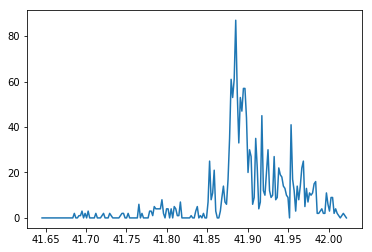

In [65]:
plt.plot(coffee_lat_count.keys(), coffee_lat_count.values())

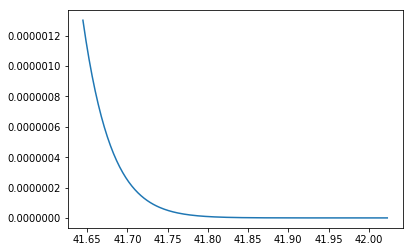

In [99]:
X = list(coffee_lat_count.values())
X = np.array(X).reshape(-1,1)
X.shape
kde = KernelDensity(kernel='gaussian', bandwidth=.15).fit(X)
log_dens = kde.score_samples(X_vals.reshape(-1,1))
plt.plot(X_vals, np.exp(log_dens))

## KDE with lats and longs

In [143]:
with open('../dataframes/df_with_libs.p', 'rb') as read_file:
    df = pickle.load(read_file)
X = df.drop(columns = ['CENSUS BLOCK', 'closest_el', 'daily_rides_closest_el', 'best_shops_under_001' ])

In [144]:
kde = KernelDensity()
kde.fit(X)

KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

In [114]:
X_vals = np.linspace(coffee_lat['block_lat'].min(), coffee_lat['block_lat'].max(), 200)
X_vals = X_vals.reshape(-1,1)
X_vals.shape

(200, 1)

In [171]:
samp_kde = pd.DataFrame(kde.sample(1000), columns=X.columns)
samp_kde.to_csv('data/kde_sample1000.csv')

<BarContainer object of 1000 artists>

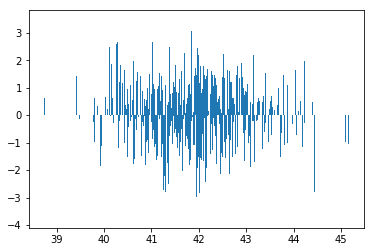

In [170]:
plt.bar( samp_kde.block_lat,samp_kde['cof_within_001'], width=.01)

In [131]:
X=df['block_lat']
Y=df['block_lon']

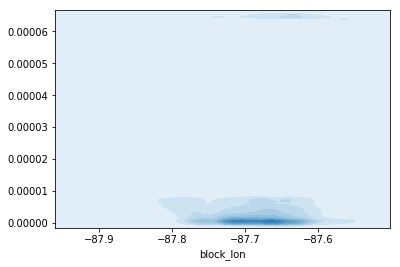

In [136]:
sns.kdeplot(Y, np.exp(log_probs), shade=True)

In [138]:
lat_plot = kde.score(X_vals)

ValueError: query data dimension must match training data dimension